#   Лаборатоная работа 5
***
***Выполнили:***

*Нечаева Анна Анатольвна, R3338, МашОб 31.1*

*Пшиншев Тимур Казбекович, R3338, МашОб 31.1*
***
**Цель работы:** построить модели классификации на основе ансамблевых алгоритмов: бэггинг и градиентный бустинг, содержащие в качестве базовых алгоритмов решающие деревья.


**Инструменты:** бэггинг решающих деревьев (случайный лес, RandomForest), градиентный бустинг над решающими деревьями (GradientBoostingRegressor)&



**Содержание:**

Построить модели классификации для соответствующего датасета. Для этого:
1. Воспользоваться результатами Лабораторной работы #1 по препроцессингу данных.
2. Разбить данные на обучающую и тестовую выборки (например, в соотношении 80/20).
3. Построить модели классификаторов при различных наборов гиперпараметров (выбрать самостоятельно).
4. Обучить модели на обучающих частях выборки.
5. Провести сравнительную оценку качества моделей на основе тестовой выборки. Критерии сравнения определяются самостоятельно.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import gdown
warnings.filterwarnings('ignore')

***
##**1. Воспользуемся результатами Лабораторной работы #1 по препроцессингу данных.**
***


In [ ]:
url_h = 'https://drive.google.com/uc?id=1v2M33jaDVJOE8XDCdgIgeL3g1eJsYbfT'

output_h = 'heart_prep.csv'

gdown.download(url_h, output_h, quiet=False)

h_data = pd.read_csv('/content/heart_prep.csv')

h_data=h_data.drop(h_data.columns.values[0],axis=1)

Downloading...
From: https://drive.google.com/uc?id=1v2M33jaDVJOE8XDCdgIgeL3g1eJsYbfT
To: /content/heart_prep.csv
100%|██████████| 79.2k/79.2k [00:00<00:00, 46.8MB/s]


In [ ]:
#  данные для классификации
'''def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

h_data = read_data('drive/MyDrive/ML_3_year_data', 'heart.csv')
'''
h_data.head()

,age,trestbps,chol,restecg,thalach,exang,ca,thal,pca1,sex_0,sex_1,cp_0,cp_1,cp_2,target
0,0.990106,1.051745,-0.196378,-1.035681,0.010781,-0.679915,-0.714129,-2.125729,1.445364,-0.652405,0.652405,-0.930249,-0.455825,-0.641468,1
1,-1.852406,0.036004,0.181507,0.886759,1.629139,-0.679915,-0.714129,-0.485221,2.393803,-0.652405,0.652405,-0.930249,-0.455825,1.553435,1
2,-1.415097,0.036004,-0.841004,-1.035681,0.973048,-0.679915,-0.714129,-0.485221,0.151204,1.527394,-1.527394,-0.930249,2.186100,-0.641468,1
3,0.224814,-0.641157,-0.129692,0.886759,1.235484,-0.679915,-0.714129,-0.485221,-0.323016,-0.652405,0.652405,-0.930249,2.186100,-0.641468,1
4,0.334141,-0.641157,2.493271,0.886759,0.579393,1.465594,-0.714129,-0.485221,-0.481089,1.527394,-1.527394,1.071196,-0.455825,-0.641468,1


***
##**2. Разбиение данных на обучающую и тестовую выборки.**
***

In [ ]:
from sklearn.model_selection import train_test_split


X = h_data.drop('target', axis=1)  # Признаки
y = h_data['target']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***
##**3. Построение модели классификаторов при различных наборах гиперпараметров.**
***

**Классификатор на основе случайного леса**

`class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)`

**Описание некоторых гиперпараметров:**

*   `n_estimators : int, default=100` $-$ количество деревьев в лесу;
*   `criterion : {“gini”, “entropy”, “log_loss”}, default=”gini”` $-$ функция для измерения качества разделения;
*   `max_depth : int, default=None` $-$ максимальная глубина дерева. Если `None`, то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать меньше `min_samples_split` выборок;
*   `min_samples_split : int or float, default=2` $-$ минимальное количество выборок, необходимое для разделения внутреннего узла;
*   `min_samples_leaf : int or float, default=1` $-$ минимальное количество выборок, необходимое для того, чтобы они находились в конечном узле. Точка разделения на любой глубине будет учитываться только в том случае, если она оставляет как минимум `min_samples_leaf` обучающих выборок в каждой левой и правой ветвях. Это может привести к сглаживанию модели, особенно при регрессии;
*   `min_weight_fraction_leaf : float, default=0.0` $-$ минимальная взвешенная доля от общей суммы весов (всех входных выборок), которая должна находиться в конечном узле. Выборки имеют одинаковый вес, если значение `sample_weight` не указано

Создание классификатора и подбор оптимальных гиперпараметров с помощью `GridSearchCV`.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Задаем параметры для GridSearchCV для классификатора
param_grid_rf = {
    'n_estimators': [2, 50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

seed = 7

np.random.seed(seed)

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=seed), param_grid=param_grid_rf, scoring='f1', cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf_classifier = grid_search_rf.best_estimator_
best_rf_hyper_p = grid_search_rf.best_params_


**Классификатор на основе градиентного бустинга**

`class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)`

*Этот алгоритм поэтапно строит аддитивную модель; он позволяет оптимизировать произвольные дифференцируемые функции потерь. На каждом этапе деревья регрессии `n_classes_` подгоняются к отрицательному градиенту функции потерь, например, к двоичным или мультиклассовым логарифмическим потерям. Бинарная классификация - это особый случай, когда индуцируется только одно дерево регрессии.*

**Описание некоторых гиперпараметров:**

*   `loss : {‘log_loss’, ‘exponential’}, default=’log_loss’` $-$ функция потерь, которую необходимо оптимизировать;
*   `learning_rate : float, default=0.1` $-$ скорость обучения уменьшает вклад каждого дерева на величину `learning_rate`. Существует компромисс между `learning_rate` и `n_estimators`. Значения должны находиться в диапазоне `[0.0, inf)`;
*   `n_estimators : int, default=100` $-$ количество выполняемых ступеней усиления. Градиентное усиление довольно устойчиво к переобучению, поэтому его большое количество обычно приводит к повышению производительности. Значения должны находиться в диапазоне `[1, inf)`;
*   `max_depth : int or None, default=3` $-$ максимальная глубина отдельных регрессионных оценок. Максимальная глубина ограничивает количество узлов в дереве. Если `None`, то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать меньше `min_samples_split` выборок. Значения должны быть в диапазоне `[1, inf)`;
*   `min_samples_split : int or float, default=2` $-$ минимальное количество выборок, необходимое для разделения внутреннего узла: если `int`, то значения должны находиться в диапазоне `[2, inf)`, если значение float, то значения должны быть в диапазоне `(0.0, 1.0)`, а значение `min_samples_split` будет равным `ceil(min_samples_split * n_samples)`.





Создание классификатора на основе градиентного бустинга и настройка гиперпараметров с помощью `GridSearchCV`.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 5],
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=seed), param_grid=param_grid_gb, scoring='f1', cv=3, n_jobs=-1)   # n_jobs для использования всех доступных процессоров
grid_search_gb.fit(X_train, y_train)

best_gb_classifier = grid_search_gb.best_estimator_
best_gb_hyper_p = grid_search_gb.best_params_


***
##**4. Обучение и оценка модели**
***

***
**💡Показатели `precision`, `recall`, `f1-score` и `support`**

*   `precision`: показывает, какую долю из всех предсказанных положительных классов составляют истинные положительные примеры. Это важно, когда важно минимизировать количество ложноположительных результатов;

*   `recall`: показывает, какую долю из всех истинных положительных классов модель смогла правильно идентифицировать. Это важно, когда необходимо минимизировать количество ложноотрицательных результатов;

*   `f1-score`: является гармоническим средним между `precision` и `recall`. Он служит для оценки модели, учитывая как ложноположительные, так и ложноотрицательные результаты. Это особенно полезно в случаях, когда необходим баланс между `precision` и `recall`. Рассчитывается по формуле:
$$ \text{f1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

*   `support`: указывает на количество истинных экземпляров каждого класса в тестовом наборе данных. Это значение помогает понять, как много примеров каждого класса было представлено в данных, и играет важную роль в интерпретации других метрик, таких как `precision`, `recall` и `f1-score`.

***

В данной части мы проводим обучение и оценку наиболее оптимальной по исследуемым гиперпараметрам модели на основе случайного леса.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

best_rf_classifier.fit(X_train, y_train)
y_pred_rf = best_rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f'F1-score случайного леса: {round(f1_rf, 3)}')
print(f'Accuracy случайного леса: {round(accuracy_rf, 3)}')
print(classification_report(y_test, y_pred_rf))

#res = pd.DataFrame(grid_search_rf.cv_results_)
#print(res.filter(regex='^(?:mean|param)'))


F1-score случайного леса: 0.871
Accuracy случайного леса: 0.86
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.84      0.90      0.87        30

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



Аналогичные обучение и оценка лучшей модели на основе градиентного бустинга.

In [ ]:
best_gb_classifier.fit(X_train, y_train)
y_pred_gb = best_gb_classifier.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
print(f'F1-score градиентного бустинга: {round(f1_gb, 3)}')
print(f'Accuracy градиентного бустинга: {round(accuracy_gb, 3)}')
print(classification_report(y_test, y_pred_gb))


F1-score градиентного бустинга: 0.875
Accuracy градиентного бустинга: 0.86
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.82      0.93      0.88        30

    accuracy                           0.86        57
   macro avg       0.87      0.86      0.86        57
weighted avg       0.87      0.86      0.86        57



***
##**5. Сравнение**
***

Для сравнительной оценки моделей в первую очередь будем использовать значение `f1_score`, так же рассмотрим показатель `accuracy`.

In [ ]:
#@title Вывод итоговой таблицы
from prettytable import PrettyTable



th = ['\u001b[36;1mЛучшая модель\u001b[0m','\u001b[36;1mГиперпараметры\u001b[0m', '\u001b[36;1mf1-score\u001b[0m', '\u001b[36;1maccuracy\u001b[0m']
td = ['\u001b[33;1mRandomForestClassifier\u001b[0m', f'\u001b[33;1m{best_rf_hyper_p}\u001b[0m', f'\u001b[33;1m{round(f1_rf, 3)}\u001b[0m', f'\u001b[33;1m{round(accuracy_rf, 3)}\u001b[0m',
      '\u001b[33;1mGradientBoostingClassifier\u001b[0m', f'\u001b[33;1m{best_gb_hyper_p}\u001b[0m', f'\u001b[33;1m{round(f1_gb, 3)}\u001b[0m', f'\u001b[33;1m{round(accuracy_gb, 3)}\u001b[0m']

columns = len(th)
table = PrettyTable(th)
td_data = td[:]

while td_data:
    table.add_row(td_data[:columns])
    td_data = td_data[columns:]

print(table)


+----------------------------+----------------------------------------------------------------+----------+----------+
|       Лучшая модель        |                         Гиперпараметры                         | f1-score | accuracy |
+----------------------------+----------------------------------------------------------------+----------+----------+
|   RandomForestClassifier   | {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200} |  0.871   |   0.86   |
| GradientBoostingClassifier |  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}   |  0.875   |   0.86   |
+----------------------------+----------------------------------------------------------------+----------+----------+


***
###**Дополнительные исследования влияния каждого из гиперпараметров на модель**
***

####*RandomForestClassifier*
***
**1. Исследуем влияние гиперпараметра `n_estimators` при остальных дефолтных значениях**
***

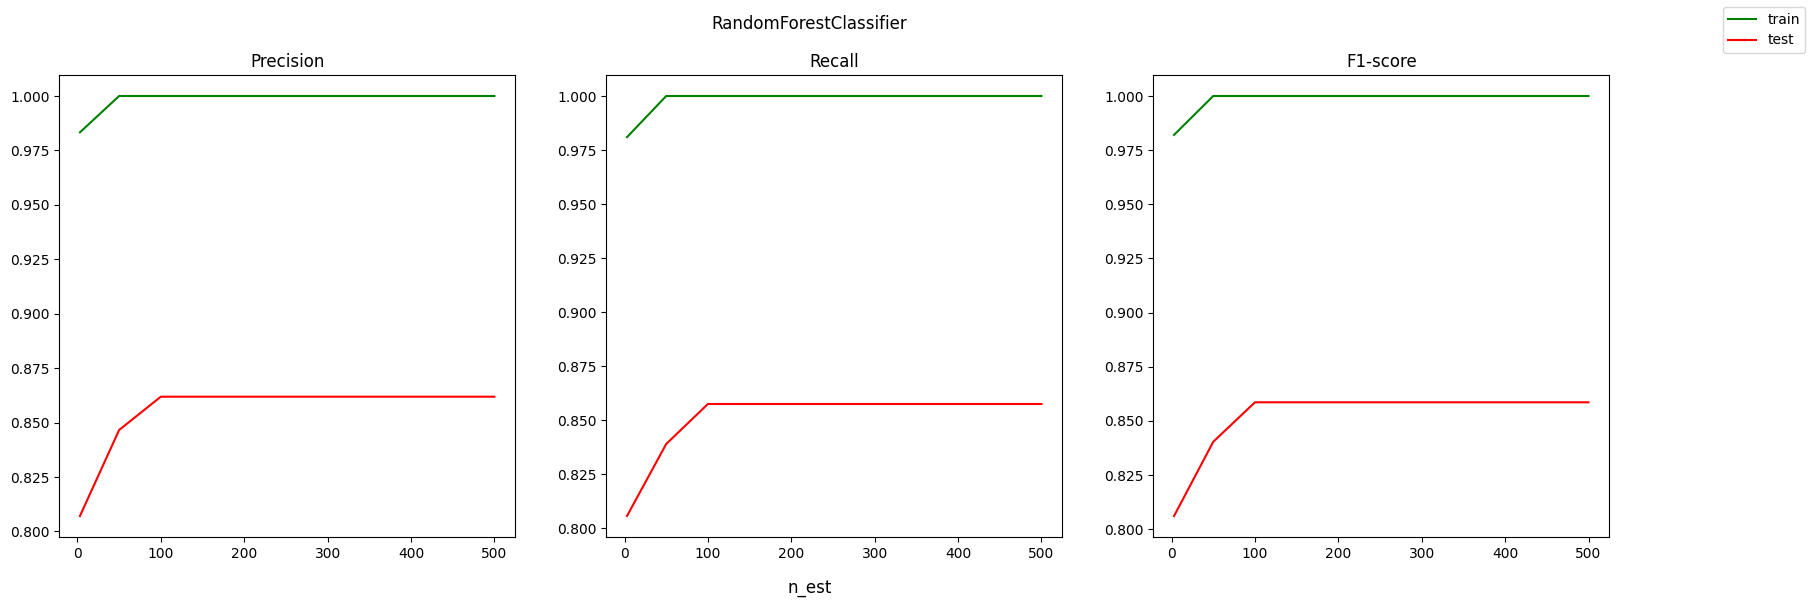

In [ ]:
#@title Исследование влияния n_estimators
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score


fr_metrix = ['Precision', 'Recall', 'F1-score']

n_est = [3, 50, 100, 150, 500]

fr_prec_tr = [0, 0, 0, 0, 0]
fr_prec_ts = [0, 0, 0, 0, 0]

fr_rec_tr = [0, 0, 0, 0, 0]
fr_rec_ts = [0, 0, 0, 0, 0]

fr_f1_tr = [0, 0, 0, 0, 0]
fr_f1_ts = [0, 0, 0, 0, 0]

fr_accur_ts = [0, 0, 0, 0, 0]

seed = 7

np.random.seed(seed)

for i in range(5):

  fr_m = RandomForestClassifier(n_estimators=n_est[i], random_state=seed)
  fr_m.fit(X_train, y_train)

  frr_pred_tr = fr_m.predict(X_train)
  frr_pred_ts = fr_m.predict(X_test)

  fr_prec_tr[i] = precision_score(y_pred=frr_pred_tr, y_true=y_train, average='macro')
  fr_prec_ts[i] = precision_score(y_pred=frr_pred_ts, y_true=y_test, average='macro')

  fr_rec_tr[i] = recall_score(y_pred=frr_pred_tr, y_true=y_train, average='macro')
  fr_rec_ts[i] = recall_score(y_pred=frr_pred_ts, y_true=y_test, average='macro')

  fr_f1_tr[i] = f1_score(y_pred=frr_pred_tr, y_true=y_train, average='macro')
  fr_f1_ts[i] = f1_score(y_pred=frr_pred_ts, y_true=y_test, average='macro')

  fr_accur_ts[i] = accuracy_score(y_test, frr_pred_ts)


fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].set_title(fr_metrix[0])
ax[0].plot(n_est, fr_prec_tr, 'g')
ax[0].plot(n_est, fr_prec_ts, 'r')

ax[1].set_title(fr_metrix[1])
ax[1].plot(n_est, fr_rec_tr, 'g')
ax[1].plot(n_est, fr_rec_ts, 'r')

ax[2].set_title(fr_metrix[2])
ax[2].plot(n_est, fr_f1_tr, 'g')
ax[2].plot(n_est, fr_f1_ts, 'r')

fig.suptitle('RandomForestClassifier')
fig.supxlabel('n_est')
fig.legend(['train', 'test'])
plt.show()


Text(0, 0.5, 'accuracy')

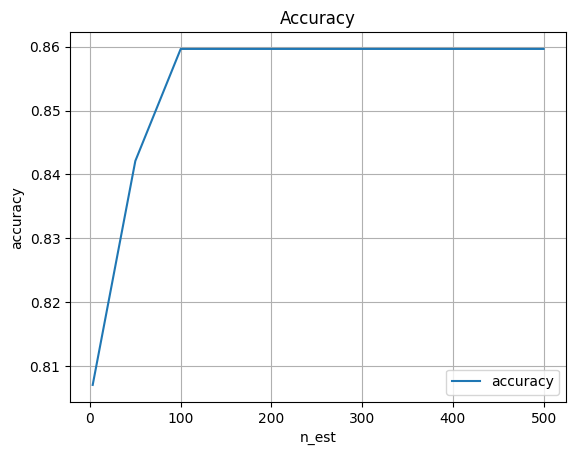

In [ ]:
#@title Влияние на accuracy
plt.plot(n_est, fr_accur_ts, label='accuracy')
plt.legend()
plt.grid('on')
plt.title('Accuracy')
plt.xlabel('n_est')
plt.ylabel('accuracy')


*   Заметим, что на исследуемых значениях **не** наблюдается переобучение и с ростом `n_estimators` растут значения всех метрик;
*   При дефолтных значениях остальных параметров, увеличение `n_estimators` больше 100 не дает выигрыша ни в точности, ни в других рассматриваемых метриках;
*   Имеет смысл рассматривать значения из промежутка `[100, 200]`

***
**2. Иссследуем влияние гиперпараметра `max_depth` при `n_estimators=100` и остальных дефолтных значениях**
***

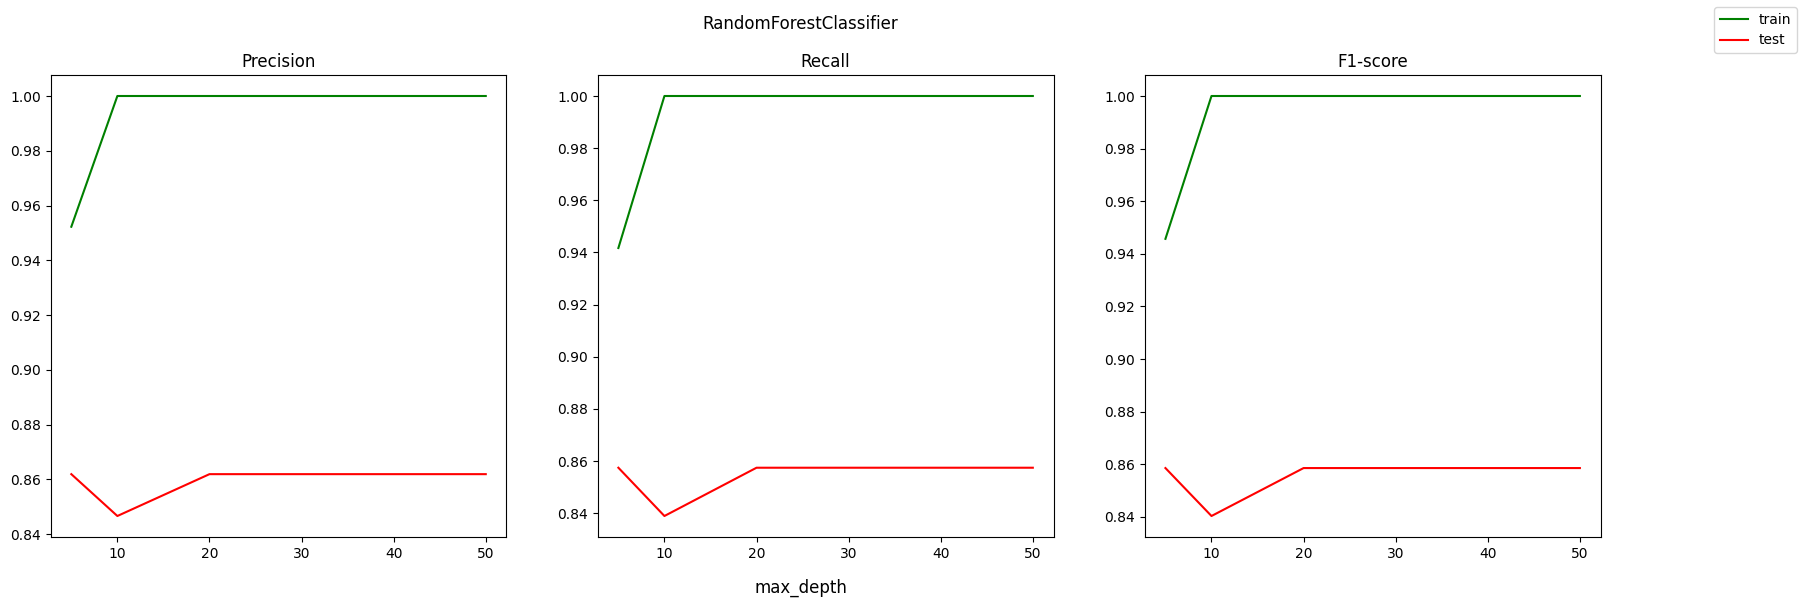

In [ ]:
#@title Исследование влияния max_depth
max_d = [None, 5, 10, 20, 50]

fr_prec_tr = [0, 0, 0, 0, 0]
fr_prec_ts = [0, 0, 0, 0, 0]

fr_rec_tr = [0, 0, 0, 0, 0]
fr_rec_ts = [0, 0, 0, 0, 0]

fr_f1_tr = [0, 0, 0, 0, 0]
fr_f1_ts = [0, 0, 0, 0, 0]

fr_accur_ts = [0, 0, 0, 0, 0]

seed = 7

np.random.seed(seed)

for i in range(5):

  fr_m = RandomForestClassifier(max_depth=max_d[i], n_estimators=100, random_state=seed)
  fr_m.fit(X_train, y_train)

  frr_pred_tr = fr_m.predict(X_train)
  frr_pred_ts = fr_m.predict(X_test)

  fr_prec_tr[i] = precision_score(y_pred=frr_pred_tr, y_true=y_train, average='macro')
  fr_prec_ts[i] = precision_score(y_pred=frr_pred_ts, y_true=y_test, average='macro')

  fr_rec_tr[i] = recall_score(y_pred=frr_pred_tr, y_true=y_train, average='macro')
  fr_rec_ts[i] = recall_score(y_pred=frr_pred_ts, y_true=y_test, average='macro')

  fr_f1_tr[i] = f1_score(y_pred=frr_pred_tr, y_true=y_train, average='macro')
  fr_f1_ts[i] = f1_score(y_pred=frr_pred_ts, y_true=y_test, average='macro')

  fr_accur_ts[i] = accuracy_score(y_test, frr_pred_ts)


fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].set_title(fr_metrix[0])
ax[0].plot(max_d, fr_prec_tr, 'g')
ax[0].plot(max_d, fr_prec_ts, 'r')

ax[1].set_title(fr_metrix[1])
ax[1].plot(max_d, fr_rec_tr, 'g')
ax[1].plot(max_d, fr_rec_ts, 'r')

ax[2].set_title(fr_metrix[2])
ax[2].plot(max_d, fr_f1_tr, 'g')
ax[2].plot(max_d, fr_f1_ts, 'r')

fig.suptitle('RandomForestClassifier')
fig.supxlabel('max_depth')
fig.legend(['train', 'test'])
plt.show()


0.8596491228070176
0.8596491228070176


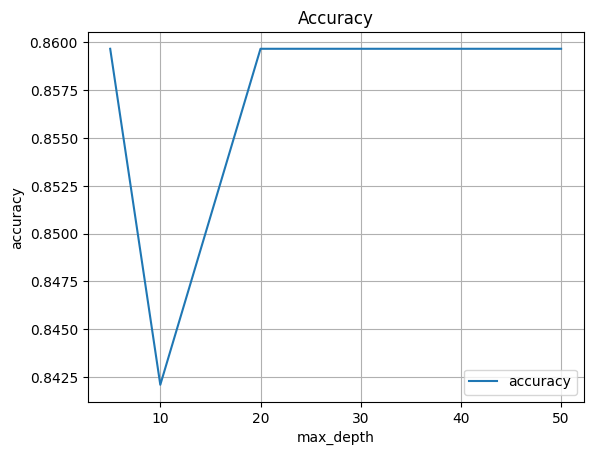

In [ ]:
#@title Влияние на accuracy
plt.plot(max_d, fr_accur_ts, label='accuracy')
plt.legend()
plt.grid('on')
plt.title('Accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

print(fr_accur_ts[0])
print(fr_accur_ts[1])


*   Для исследуемых значений самое неоптимальное `max_depth=10` при `n_estimators=100`, однако при `n_estimators=200` все рассматриваемые значения `max_depth` становятся равнозначными, следовательно, существует взаимосвязь этих двух гиперпараметров

***
**3. Исследуем влияние гиперпараметра `min_samples_split` на модель при дефолтных значениях остальных гиперпараметров**
***

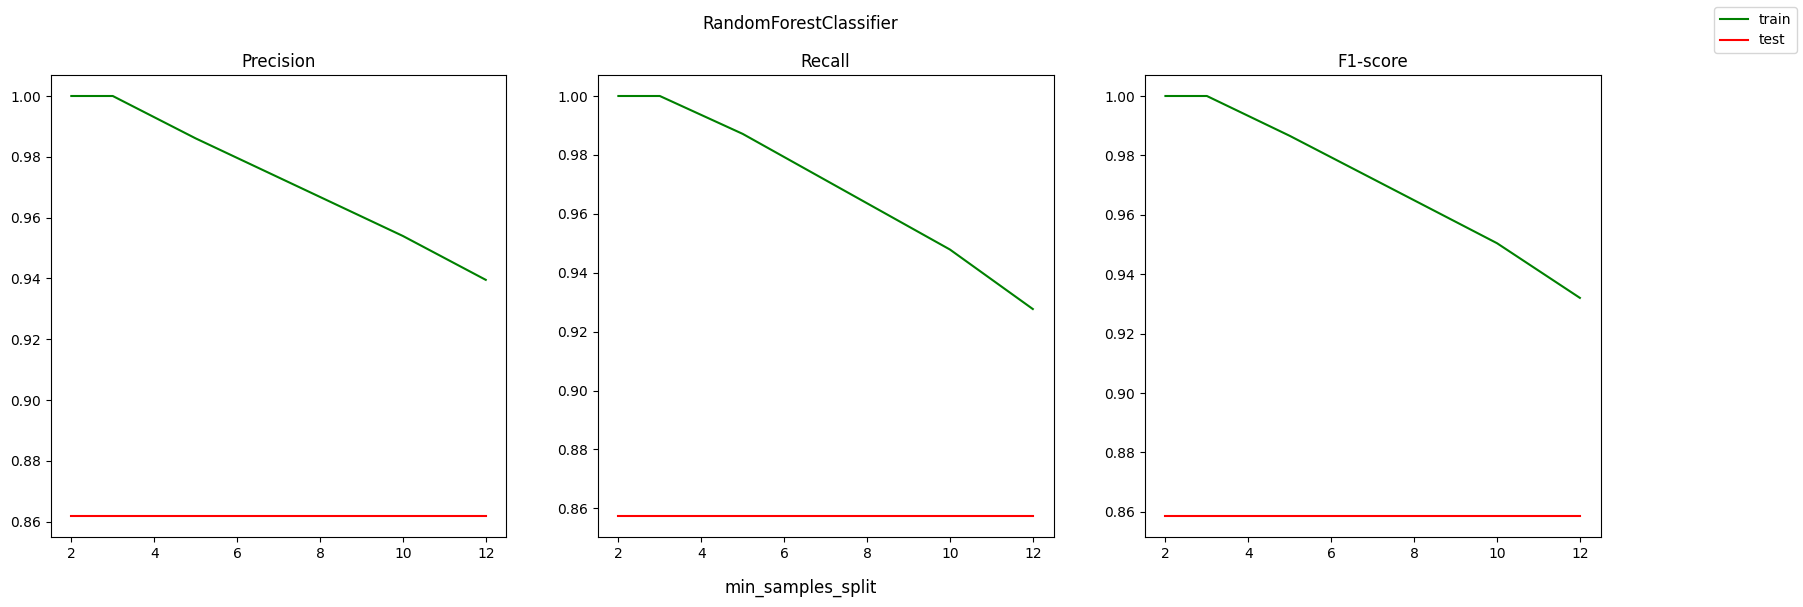

In [ ]:
#@title Исследование влияния min_samples_split
min_s_s = [2, 3, 5, 10, 12]

fr_prec_tr = [0, 0, 0, 0, 0]
fr_prec_ts = [0, 0, 0, 0, 0]

fr_rec_tr = [0, 0, 0, 0, 0]
fr_rec_ts = [0, 0, 0, 0, 0]

fr_f1_tr = [0, 0, 0, 0, 0]
fr_f1_ts = [0, 0, 0, 0, 0]

fr_accur_ts = [0, 0, 0, 0, 0]

seed = 7

np.random.seed(seed)

for i in range(5):

  fr_m = RandomForestClassifier(min_samples_split=min_s_s[i], n_estimators=100, random_state=seed)
  fr_m.fit(X_train, y_train)

  frr_pred_tr = fr_m.predict(X_train)
  frr_pred_ts = fr_m.predict(X_test)

  fr_prec_tr[i] = precision_score(y_pred=frr_pred_tr, y_true=y_train, average='macro')
  fr_prec_ts[i] = precision_score(y_pred=frr_pred_ts, y_true=y_test, average='macro')

  fr_rec_tr[i] = recall_score(y_pred=frr_pred_tr, y_true=y_train, average='macro')
  fr_rec_ts[i] = recall_score(y_pred=frr_pred_ts, y_true=y_test, average='macro')

  fr_f1_tr[i] = f1_score(y_pred=frr_pred_tr, y_true=y_train, average='macro')
  fr_f1_ts[i] = f1_score(y_pred=frr_pred_ts, y_true=y_test, average='macro')

  fr_accur_ts[i] = accuracy_score(y_test, frr_pred_ts)


fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].set_title(fr_metrix[0])
ax[0].plot(min_s_s, fr_prec_tr, 'g')
ax[0].plot(min_s_s, fr_prec_ts, 'r')

ax[1].set_title(fr_metrix[1])
ax[1].plot(min_s_s, fr_rec_tr, 'g')
ax[1].plot(min_s_s, fr_rec_ts, 'r')

ax[2].set_title(fr_metrix[2])
ax[2].plot(min_s_s, fr_f1_tr, 'g')
ax[2].plot(min_s_s, fr_f1_ts, 'r')

fig.suptitle('RandomForestClassifier')
fig.supxlabel('min_samples_split')
fig.legend(['train', 'test'])
plt.show()

0.8596491228070176
0.8596491228070176


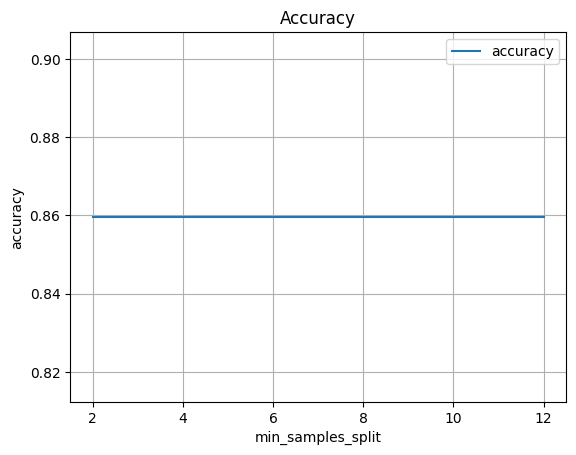

In [ ]:
#@title Влияние на accuracy
plt.plot(min_s_s, fr_accur_ts, label='accuracy')
plt.legend()
plt.grid('on')
plt.title('Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')

print(fr_accur_ts[0])
print(fr_accur_ts[1])

*   Значение данного гиперпараметра не оказывает существенного влияния на результаты работы модели с тестовой выборкой при значениях по умолчанию у других гиперпараметров

####*GradientBoostingClassifier*

***
**1. Исследуем влияние гиперпараметра `n_estimators` при остальных дефолтных значениях**
***

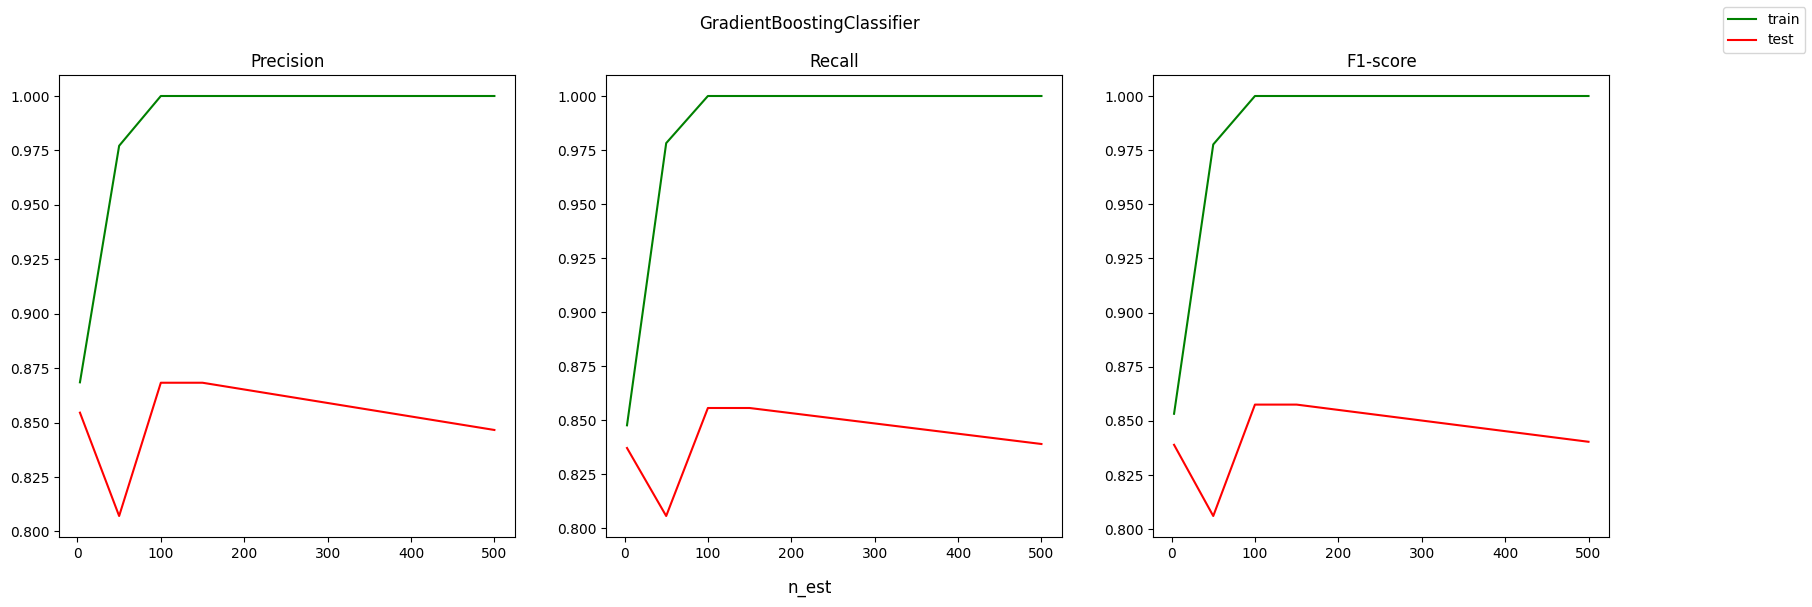

In [ ]:
#@title Исследование влияния n_estimators
gb_metrix = ['Precision', 'Recall', 'F1-score']

n_est = [3, 50, 100, 150, 500]

gb_prec_tr = [0, 0, 0, 0, 0]
gb_prec_ts = [0, 0, 0, 0, 0]

gb_rec_tr = [0, 0, 0, 0, 0]
gb_rec_ts = [0, 0, 0, 0, 0]

gb_f1_tr = [0, 0, 0, 0, 0]
gb_f1_ts = [0, 0, 0, 0, 0]

gb_accur_ts = [0, 0, 0, 0, 0]

seed = 7

np.random.seed(seed)

for i in range(5):

  gb_m = GradientBoostingClassifier(n_estimators=n_est[i], random_state=seed)
  gb_m.fit(X_train, y_train)

  gbb_pred_tr = gb_m.predict(X_train)
  gbb_pred_ts = gb_m.predict(X_test)

  gb_prec_tr[i] = precision_score(y_pred=gbb_pred_tr, y_true=y_train, average='macro')
  gb_prec_ts[i] = precision_score(y_pred=gbb_pred_ts, y_true=y_test, average='macro')

  gb_rec_tr[i] = recall_score(y_pred=gbb_pred_tr, y_true=y_train, average='macro')
  gb_rec_ts[i] = recall_score(y_pred=gbb_pred_ts, y_true=y_test, average='macro')

  gb_f1_tr[i] = f1_score(y_pred=gbb_pred_tr, y_true=y_train, average='macro')
  gb_f1_ts[i] = f1_score(y_pred=gbb_pred_ts, y_true=y_test, average='macro')

  gb_accur_ts[i] = accuracy_score(y_test, gbb_pred_ts)


fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].set_title(gb_metrix[0])
ax[0].plot(n_est, gb_prec_tr, 'g')
ax[0].plot(n_est, gb_prec_ts, 'r')

ax[1].set_title(gb_metrix[1])
ax[1].plot(n_est, gb_rec_tr, 'g')
ax[1].plot(n_est, gb_rec_ts, 'r')

ax[2].set_title(gb_metrix[2])
ax[2].plot(n_est, gb_f1_tr, 'g')
ax[2].plot(n_est, gb_f1_ts, 'r')

fig.suptitle('GradientBoostingClassifier')
fig.supxlabel('n_est')
fig.legend(['train', 'test'])
plt.show()


Text(0, 0.5, 'accuracy')

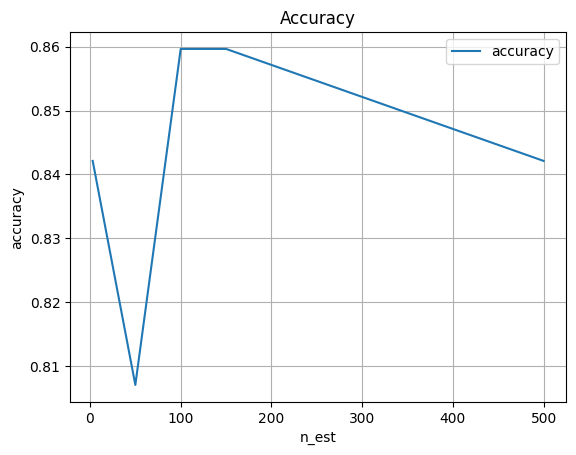

In [ ]:
#@title Влияние на accuracy
plt.plot(n_est, gb_accur_ts, label='accuracy')
plt.legend()
plt.grid('on')
plt.title('Accuracy')
plt.xlabel('n_est')
plt.ylabel('accuracy')

*   При увеличении `n_estimators` больше 150, наблюдается переобучение;
*   Наиболее оптимальные значения лежат в промежутке от 100 до 150

***
**2. Иссследуем влияние гиперпараметра `max_depth` при `n_estimators=100` и остальных дефолтных значениях**
***

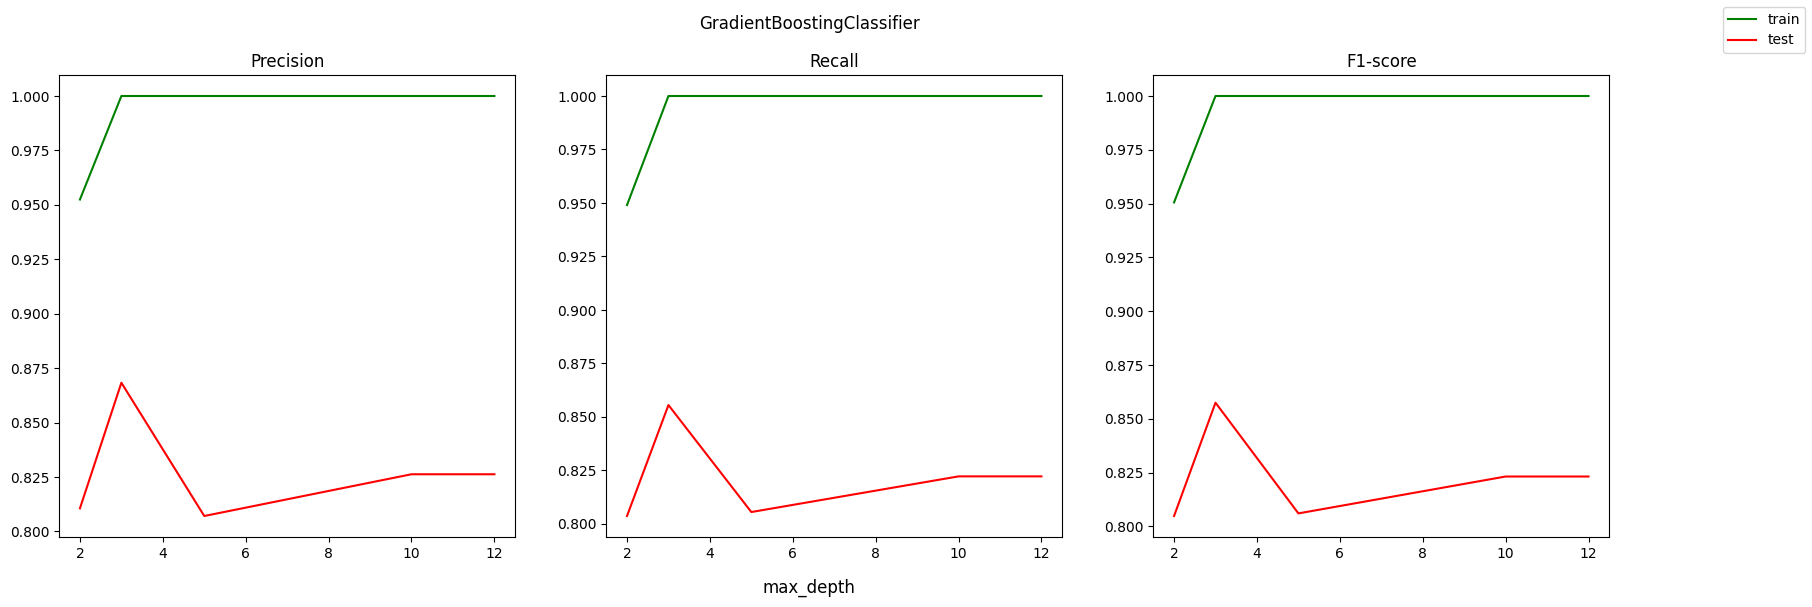

In [ ]:
#@title Исследование влияния max_depth
gb_metrix = ['Precision', 'Recall', 'F1-score']

max_d = [2, 3, 5, 10, 12]

gb_prec_tr = [0, 0, 0, 0, 0]
gb_prec_ts = [0, 0, 0, 0, 0]

gb_rec_tr = [0, 0, 0, 0, 0]
gb_rec_ts = [0, 0, 0, 0, 0]

gb_f1_tr = [0, 0, 0, 0, 0]
gb_f1_ts = [0, 0, 0, 0, 0]

gb_accur_ts = [0, 0, 0, 0, 0]

seed = 7

np.random.seed(seed)

for i in range(5):

  gb_m = GradientBoostingClassifier(n_estimators=100, max_depth=max_d[i], random_state=seed)
  gb_m.fit(X_train, y_train)

  gbb_pred_tr = gb_m.predict(X_train)
  gbb_pred_ts = gb_m.predict(X_test)

  gb_prec_tr[i] = precision_score(y_pred=gbb_pred_tr, y_true=y_train, average='macro')
  gb_prec_ts[i] = precision_score(y_pred=gbb_pred_ts, y_true=y_test, average='macro')

  gb_rec_tr[i] = recall_score(y_pred=gbb_pred_tr, y_true=y_train, average='macro')
  gb_rec_ts[i] = recall_score(y_pred=gbb_pred_ts, y_true=y_test, average='macro')

  gb_f1_tr[i] = f1_score(y_pred=gbb_pred_tr, y_true=y_train, average='macro')
  gb_f1_ts[i] = f1_score(y_pred=gbb_pred_ts, y_true=y_test, average='macro')

  gb_accur_ts[i] = accuracy_score(y_test, gbb_pred_ts)


fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].set_title(gb_metrix[0])
ax[0].plot(max_d, gb_prec_tr, 'g')
ax[0].plot(max_d, gb_prec_ts, 'r')

ax[1].set_title(gb_metrix[1])
ax[1].plot(max_d, gb_rec_tr, 'g')
ax[1].plot(max_d, gb_rec_ts, 'r')

ax[2].set_title(gb_metrix[2])
ax[2].plot(max_d, gb_f1_tr, 'g')
ax[2].plot(max_d, gb_f1_ts, 'r')

fig.suptitle('GradientBoostingClassifier')
fig.supxlabel('max_depth')
fig.legend(['train', 'test'])
plt.show()

Text(0, 0.5, 'accuracy')

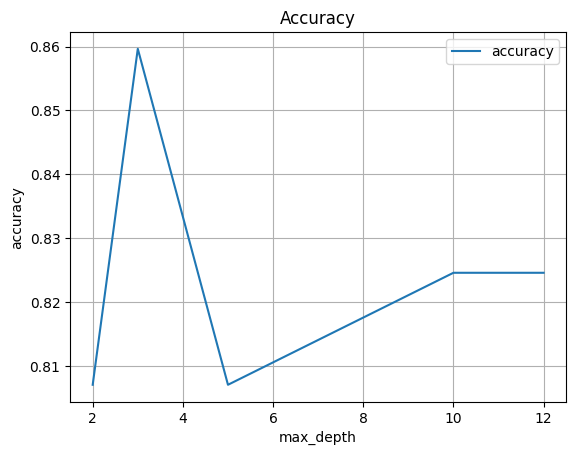

In [ ]:
#@title Влияние на accuracy
plt.plot(max_d, gb_accur_ts, label='accuracy')
plt.legend()
plt.grid('on')
plt.title('Accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

*   При `n_estimators=100` и остальных дефолтных гиперпараметрах, оптимальным значением `max_depth` является 3

***
**3. Иссследуем влияние гиперпараметра `learning_rate` при `n_estimators=100` и остальных дефолтных значениях**
***

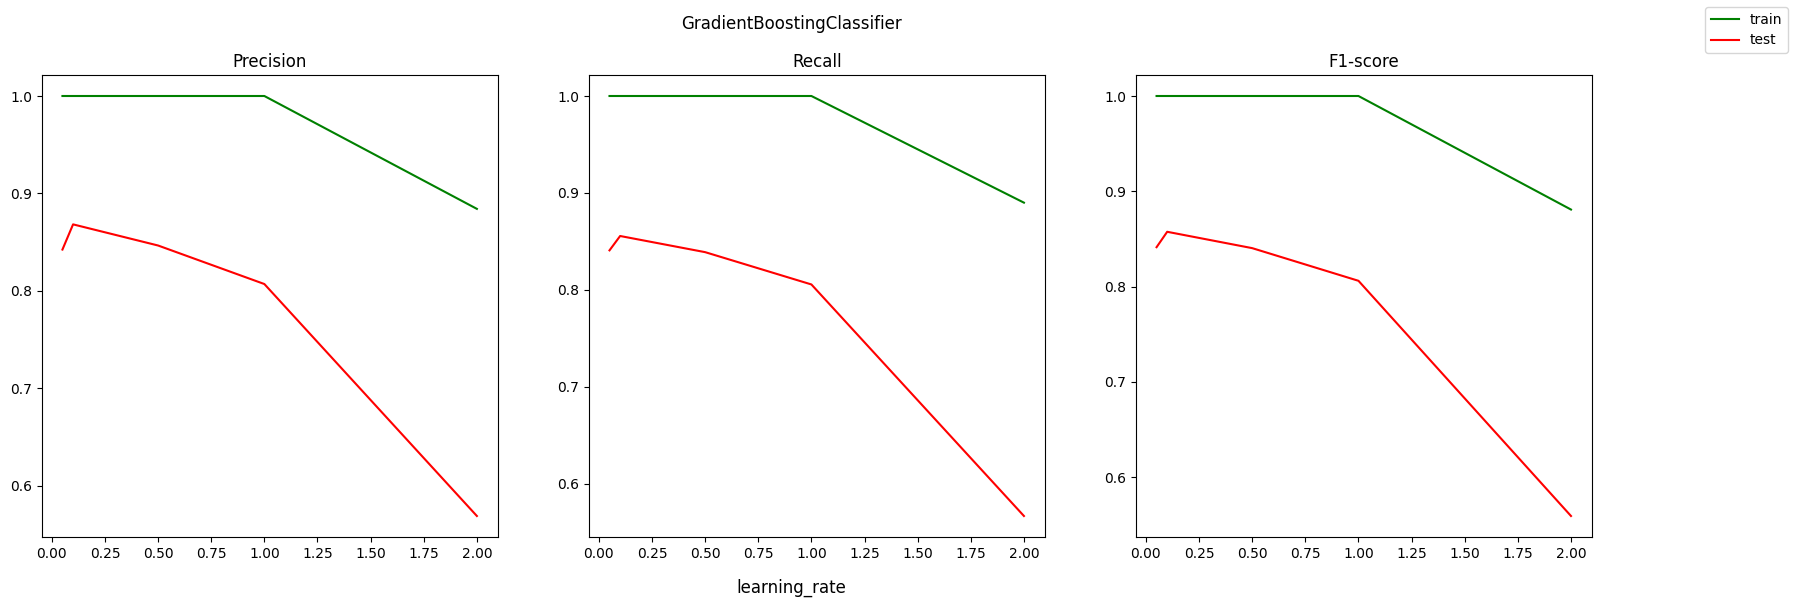

In [ ]:
#@title Исследование влияния learning_rate
gb_metrix = ['Precision', 'Recall', 'F1-score']

learn_r = [0.05, 0.1, 0.5, 1, 2]

gb_prec_tr = [0, 0, 0, 0, 0]
gb_prec_ts = [0, 0, 0, 0, 0]

gb_rec_tr = [0, 0, 0, 0, 0]
gb_rec_ts = [0, 0, 0, 0, 0]

gb_f1_tr = [0, 0, 0, 0, 0]
gb_f1_ts = [0, 0, 0, 0, 0]

gb_accur_ts = [0, 0, 0, 0, 0]

seed = 7

np.random.seed(seed)

for i in range(5):

  gb_m = GradientBoostingClassifier(n_estimators=200, learning_rate=learn_r[i], random_state=seed)
  gb_m.fit(X_train, y_train)

  gbb_pred_tr = gb_m.predict(X_train)
  gbb_pred_ts = gb_m.predict(X_test)

  gb_prec_tr[i] = precision_score(y_pred=gbb_pred_tr, y_true=y_train, average='macro')
  gb_prec_ts[i] = precision_score(y_pred=gbb_pred_ts, y_true=y_test, average='macro')

  gb_rec_tr[i] = recall_score(y_pred=gbb_pred_tr, y_true=y_train, average='macro')
  gb_rec_ts[i] = recall_score(y_pred=gbb_pred_ts, y_true=y_test, average='macro')

  gb_f1_tr[i] = f1_score(y_pred=gbb_pred_tr, y_true=y_train, average='macro')
  gb_f1_ts[i] = f1_score(y_pred=gbb_pred_ts, y_true=y_test, average='macro')

  gb_accur_ts[i] = accuracy_score(y_test, gbb_pred_ts)


fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].set_title(gb_metrix[0])
ax[0].plot(learn_r, gb_prec_tr, 'g')
ax[0].plot(learn_r, gb_prec_ts, 'r')

ax[1].set_title(gb_metrix[1])
ax[1].plot(learn_r, gb_rec_tr, 'g')
ax[1].plot(learn_r, gb_rec_ts, 'r')

ax[2].set_title(gb_metrix[2])
ax[2].plot(learn_r, gb_f1_tr, 'g')
ax[2].plot(learn_r, gb_f1_ts, 'r')

fig.suptitle('GradientBoostingClassifier')
fig.supxlabel('learning_rate')
fig.legend(['train', 'test'])
plt.show()

Text(0, 0.5, 'accuracy')

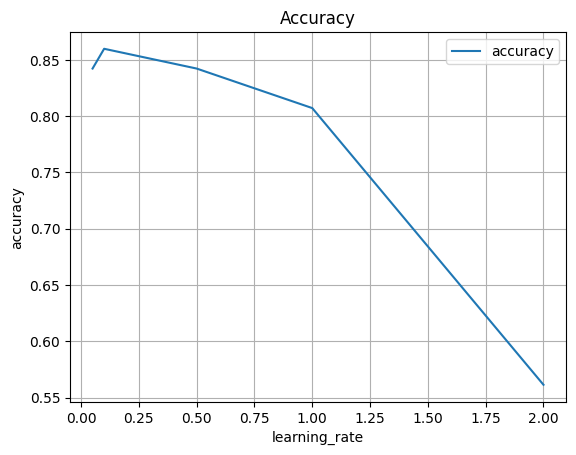

In [ ]:
#@title Влияние на accuracy
plt.plot(learn_r, gb_accur_ts, label='accuracy')
plt.legend()
plt.grid('on')
plt.title('Accuracy')
plt.xlabel('learning_rate')
plt.ylabel('accuracy')

*   При `n_estimators=100` и других дефолтных значениях гиперпараметров, наиболее оптимальное значение `learning_rate=0.1`;
*   При `n_estimators=200` результат повторяется

***
##**Результаты работы**
***
В ходе выполнения лабораторной работы построены модели классификации на основе ансамблевых алгоритмов: бэггинг (`RandomForestClassifier` из библиотеки `sklearn.ensemble`) и градиентный бустинг (`GradientBoostingClassifier`из библиотеки `sklearn.ensemble`).

Для каждой модели были выбраны гиперпараметры для построения оптимальной модели. В случае `RandomForestClassifier`: количество деревьев в лесу (`n_estimators`), максимальная глубина дерева (`max_depth`) и минимальное количество выборок, необходимое для разделения внутреннего узла (`min_samples_split`). Для `GradientBoostingClassifier` : количество выполняемых ступеней усиления (`n_estimators`), максимальная глубина отдельных регрессионных оценок (`max_depth`) и скорость обучения (`learning_rate`). Наиболее подходящие значения гиперпараметров моделей определялись с помощью инструмента `GridSearchCV` из библиотеки `sklearn.model_selection`.